# Predicting Forest Fires area using Support Vector Machine(SVM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fire=pd.read_csv("C:\forestfires (2).csv")

In [3]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
fire=fire.drop(['month','day'], axis=1)

In [7]:
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


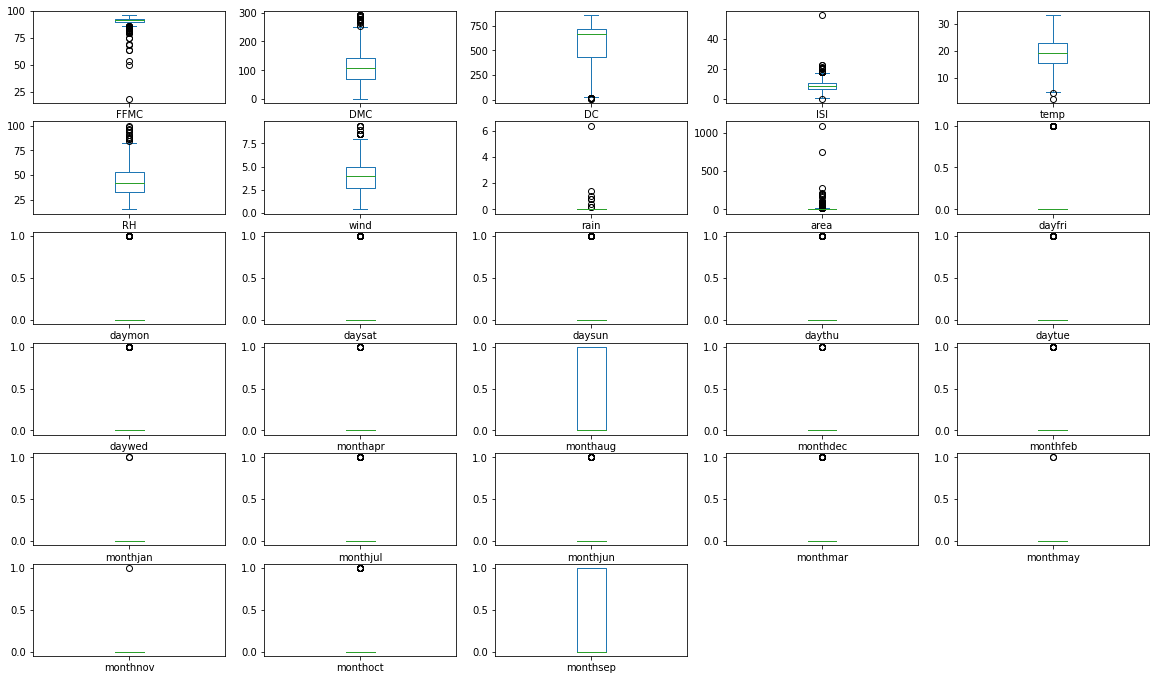

In [8]:
#Here we have Subplots of Boxplot each for a column and we can see that there are many outliers in the dataset this will surely impact our accuracy but using SVM
#SVM algorithm handles outliers well 
fire.plot(kind='box',subplots=True, layout=(10,5),figsize=(20,20))
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [10]:
le=LabelEncoder()
fire['size_category']=le.fit_transform(fire['size_category'])
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
scaler=StandardScaler()
fire[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]=scaler.fit_transform(fire[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']])
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
from scipy import stats
zsc=stats.zscore(fire) #Trying to remove outliers based on Z scores and removing the datapoints which are above Zscore=3 
zscores=np.abs(zsc)  #Making all values absolute to make -ve alues to +ve so that we can easily remove the Zscores above 3
filter_zscores=(zscores<3).all(axis=1)
filtered=fire[filter_zscores] #here there are 122 rows outliers as we can see after transforming df and trying to eliminate the zvalues above 3 and below -3

In [13]:
filtered.shape

(395, 29)

In [14]:
fire.shape

(517, 29)

In [15]:
filtered

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.00,1,...,0,0,0,0,1,0,0,0,0,1
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.569770,-0.736124,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,11.16,0,...,0,0,0,0,0,0,0,0,0,0


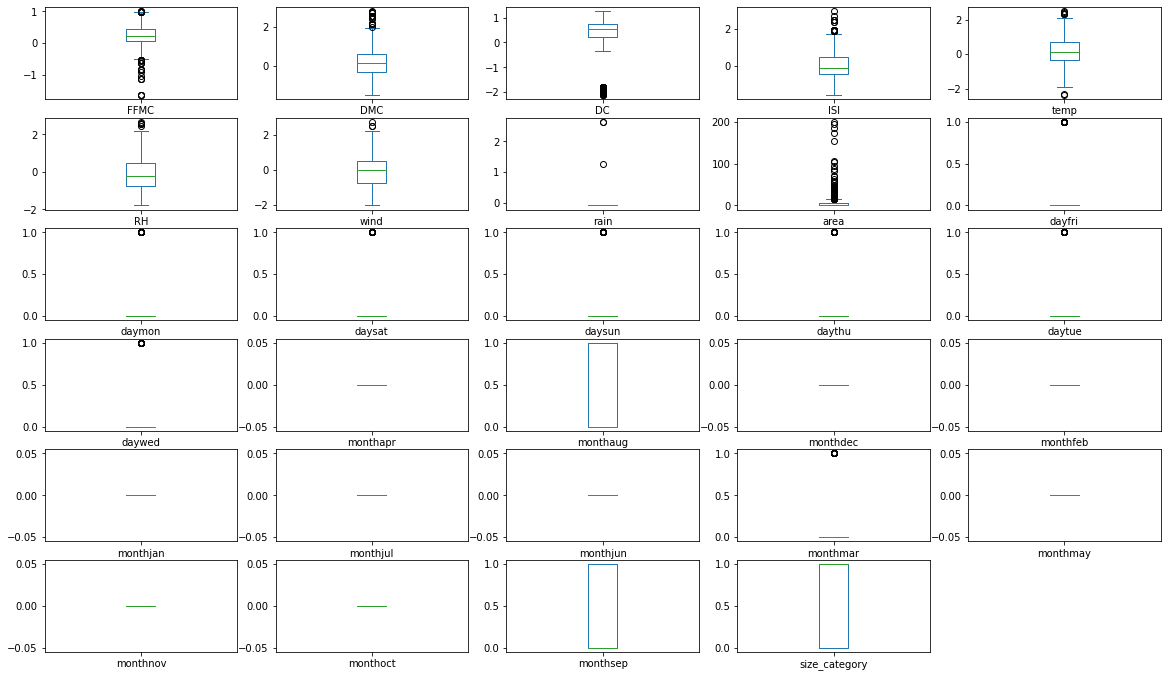

In [16]:
filtered.plot(kind='box',subplots=True, layout=(10,5),figsize=(20,20))
plt.show()

In [17]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.05,random_state=0)
clf.fit(filtered)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=0)

In [18]:
filtered['anomaly']=clf.predict(filtered)
filtered

<ipython-input-18-48a6d238a64b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['anomaly']=clf.predict(filtered)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anomaly
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.00,1,...,0,0,0,1,0,0,0,0,1,1
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,1,1
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,1,1
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,1,1
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,0.00,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.569770,-0.736124,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,1,1
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,6.44,0,...,0,0,0,0,0,0,0,0,0,-1
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,54.29,0,...,0,0,0,0,0,0,0,0,0,-1
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,11.16,0,...,0,0,0,0,0,0,0,0,0,-1


In [19]:
filtered.shape

(395, 30)

In [20]:
# through Isolation forest we have dropped 20 records at assumption of 5% contamination
filtered.drop(filtered[filtered['anomaly']==-1].index,inplace=True)
filtered.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(375, 30)

In [21]:
filtered=filtered.drop(['anomaly'],axis=1)
filtered

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.00,1,...,0,0,0,0,1,0,0,0,0,1
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.064430,0.875644,0.825821,-0.421874,1.208554,-0.201709,-0.233308,-0.073268,0.00,1,...,0,0,0,0,0,0,0,0,0,1
508,0.064430,0.875644,0.825821,-0.421874,1.208554,-0.201709,-0.233308,-0.073268,0.00,1,...,0,0,0,0,0,0,0,0,0,1
510,0.064430,0.875644,0.825821,-0.421874,-0.118801,1.086501,0.772325,-0.073268,0.43,1,...,0,0,0,0,0,0,0,0,0,1
511,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.569770,-0.736124,-0.073268,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [1]:
#pip install sweetviz

In [23]:
#Automatic EDA using Sweetviz
import sweetviz as sv
sweet_report=sv.analyze(filtered)
sweet_report.show_html('EDA_of_FireForests.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_of_FireForests.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


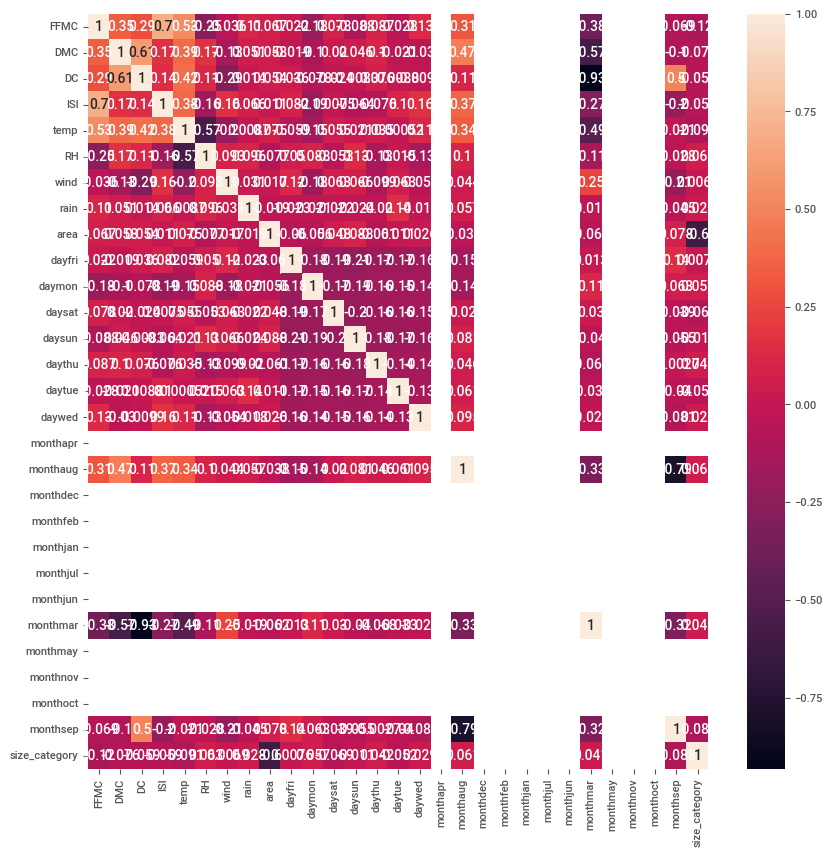

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(filtered.corr(),annot=True)
plt.show()
#here from Heatmap we can see that correlation is very high between independent Variables leading to Multicollinearity Problem

In [25]:
filtered.size_category.value_counts()

1    289
0     86
Name: size_category, dtype: int64

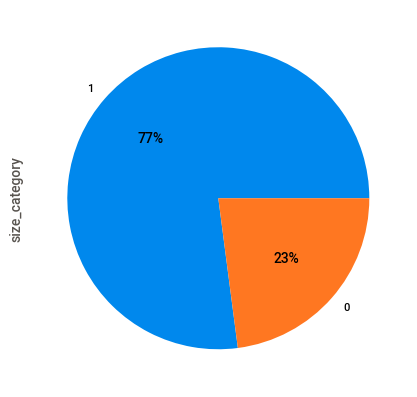

In [26]:
#here Dependent Variable Size_Category delts with imbalanced Dataset we have to use Oversampling of minority class and undersampling of Majority class using imblearn module
filtered.size_category.value_counts().plot(kind='pie',autopct='%.0f%%' ,figsize=(5,5))

In [27]:
X=filtered.iloc[:,:28]
Y=filtered.iloc[:,28:]
Y.value_counts()

size_category
1                289
0                 86
dtype: int64

# Lets use SMOTE from imblearn library to handle imbalance data



### Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.





### This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.


In [28]:

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline



###  We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.


In [29]:

from collections import Counter
from numpy import where


In [30]:

# summarize class distribution
counter = Counter(Y)
print(counter)


Counter({'size_category': 1})



### We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).


In [31]:

over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.9)



### We can then chain these two transforms together into a Pipeline.



### The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.


In [32]:
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)



### The pipeline can then be fit and applied to our dataset just like a single transform:


In [33]:

#Transform the Dataset by oversampling minority Class and Under-sampling Majority Class
X,Y=pipeline.fit_resample(X,Y)
#Summarize new Class Distribution
counter=Counter(Y)
print(counter)


Counter({'size_category': 1})


In [34]:

#now we can see that minority class increased and majority class decreased 
Y.value_counts()


size_category
1                256
0                231
dtype: int64

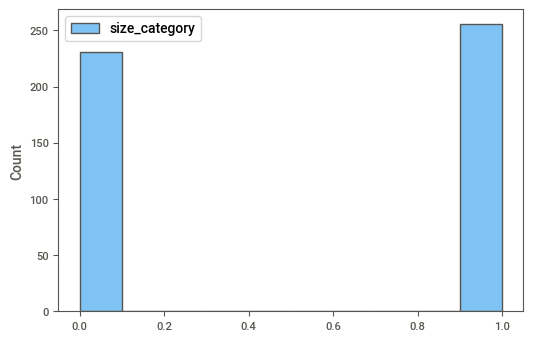

In [35]:

sns.histplot(Y)



# Model Creation after Oversampling and Undersampling


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
#converting train test variable to array in order to use modin,pandas to improve computational speed by 70x
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC



In [37]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gscv=GridSearchCV(clf,param_grid=param_grid,cv=10)
gscv.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [38]:
gscv.best_params_,gscv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9725378787878789)

In [39]:
model=SVC(gamma=0.5,C=15)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


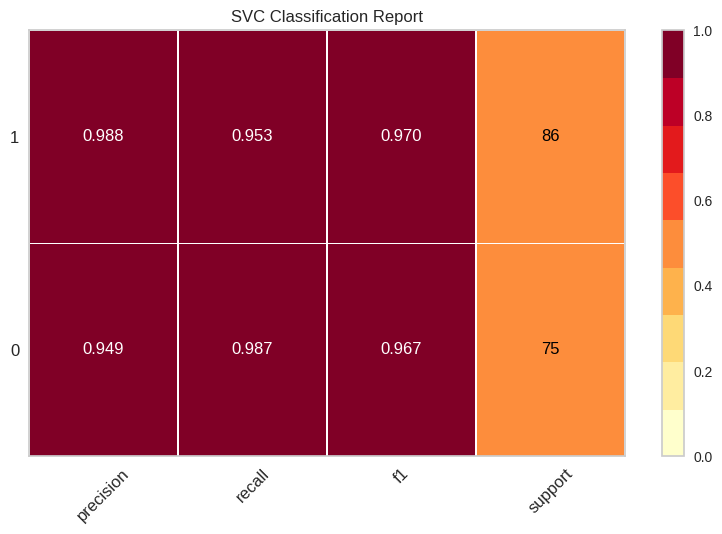

In [40]:

from yellowbrick import ClassBalance
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix , ROCAUC , ClassPredictionError

#Classification_Report 
cr_visualizer= ClassificationReport(model,support=True)
cr_visualizer.fit(x_train,y_train)
cr_visualizer.score(x_test,y_test)
cr_visualizer.show()


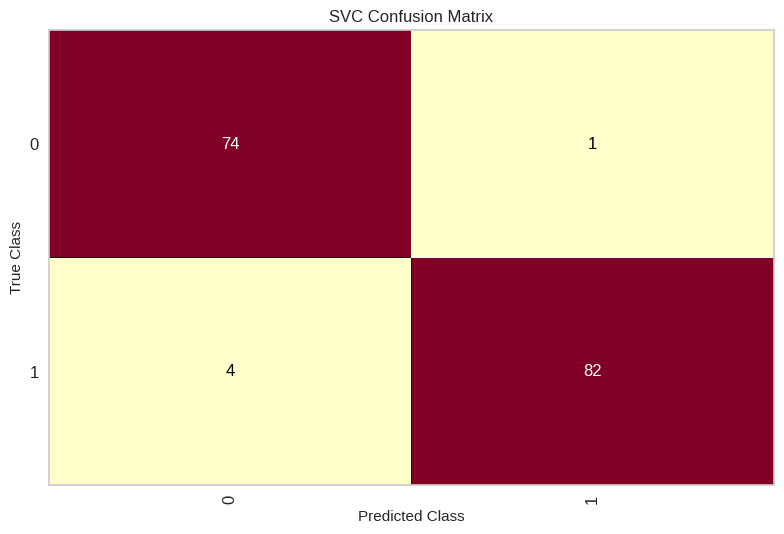

In [41]:

#confusion_matrix
cm= ConfusionMatrix(model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.show()


In [42]:
y_pred=model.predict(x_test)

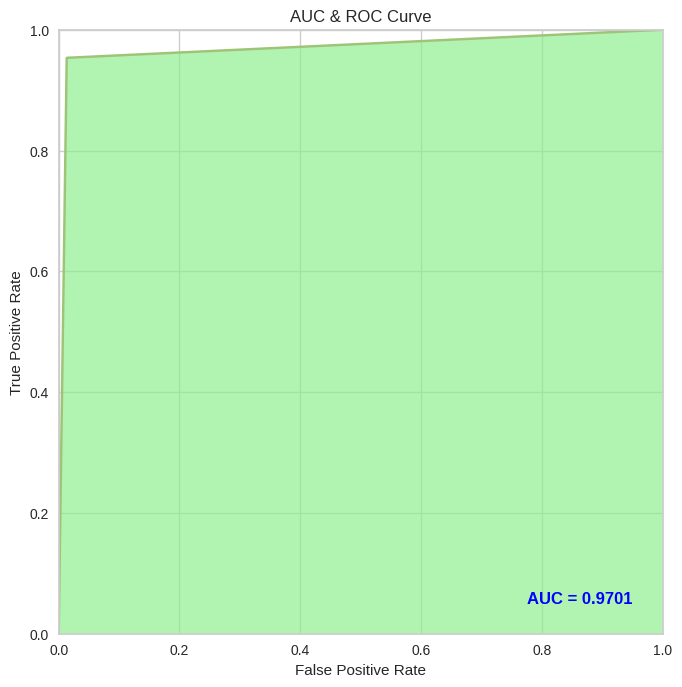

In [43]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

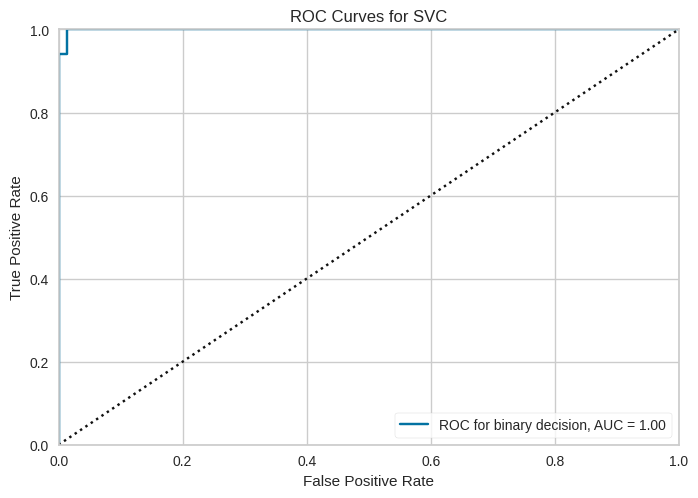

In [44]:

#Roc and AUC 
rocauc=ROCAUC(model,binary=True)
rocauc.fit(x_train,y_train)
rocauc.score(x_test,y_test)
rocauc.show()


In [45]:
#pip install lazypredict

In [46]:
# Lets see with other Algorithms which can provide us Best accuracy on this Dataset

from lazypredict.Supervised import LazyClassifier
d=LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions=d.fit(x_train,x_test,y_train,y_test)
print(models)

 14%|█▍        | 4/29 [00:00<00:00, 32.31it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 52%|█████▏    | 15/29 [00:00<00:00, 29.47it/s]

LabelPropagation model failed to execute
underflow encountered in exp
LabelSpreading model failed to execute
underflow encountered in exp


100%|██████████| 29/29 [00:01<00:00, 26.59it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             1.00               1.00     1.00      1.00   
AdaBoostClassifier                 0.99               0.99     0.99      0.99   
BaggingClassifier                  0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
DecisionTreeClassifier             0.99               0.99     0.99      0.99   
LGBMClassifier                     0.99               0.99     0.99      0.99   
LinearSVC                          0.98               0.97     0.97      0.98   
GaussianNB                         0.97               0.97     0.97      0.97   
PassiveAggressiveClassifier        0.97               0.97     0.97      0.97   
Pe